# Bioinformatics 575 Group Project


***Lung Cancer Subtypes***

### Task 1 - Load the Data

In [3]:
#install GEOparse to load data set
pip install GEOparse

SyntaxError: invalid syntax (2471525078.py, line 2)

In [ ]:
#Access lung cancer data
#Link to data file: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE10245

In [2]:
import GEOparse
gse = GEOparse.get_GEO(geo="GSE10245", destdir="./")

12-Nov-2023 18:21:28 DEBUG utils - Directory ./ already exists. Skipping.
12-Nov-2023 18:21:28 INFO GEOparse - File already exist: using local version.
12-Nov-2023 18:21:28 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
12-Nov-2023 18:21:28 DEBUG GEOparse - DATABASE: GeoMiame
12-Nov-2023 18:21:28 DEBUG GEOparse - SERIES: GSE10245
12-Nov-2023 18:21:28 DEBUG GEOparse - PLATFORM: GPL570
/Users/haikun/anaconda3/lib/python3.11/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
12-Nov-2023 18:21:29 DEBUG GEOparse - SAMPLE: GSM258551
12-Nov-2023 18:21:29 DEBUG GEOparse - SAMPLE: GSM258552
12-Nov-2023 18:21:29 DEBUG GEOparse - SAMPLE: GSM258553
12-Nov-2023 18:21:29 DEBUG GEOparse - SAMPLE: GSM258554
12-Nov-2023 18:21:29 DEBUG GEOparse - SAMPLE: GSM258555
12-Nov-2023 18:21:29 DEBUG GEOparse - SAMPLE: GSM258556
12-Nov-2023 18:21:29 DEBUG GEOpar

In [ ]:
# sklearn.cluster module link: https://scikit-learn.org/stable/modules/clustering.html#k-means
# K-Means Algorithm link: https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_clustering_algorithms_k_means.htm

In [4]:
import pandas as pd
data = gse.pivot_samples('VALUE')
df = data.T

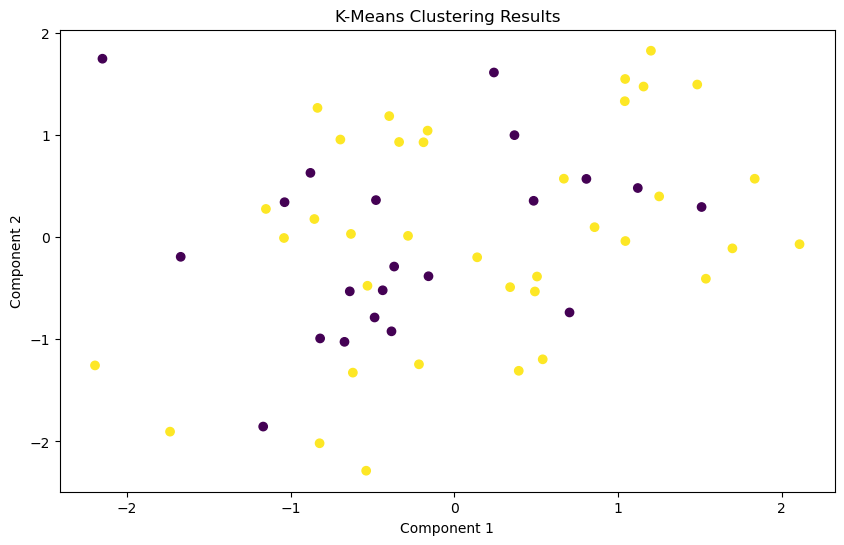

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# optional for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clustering Results")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()